**Ejercicio Análisis Módulo 6**

Carga de Librerías


In [224]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Carga de Base de datos


In [225]:
datos = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')

Exploración de datos

In [226]:
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [227]:
datos.shape

(1338, 7)

Validar si existen datos nulos

Text(0.5, 1.0, 'Valores faltantes en la base de datos')

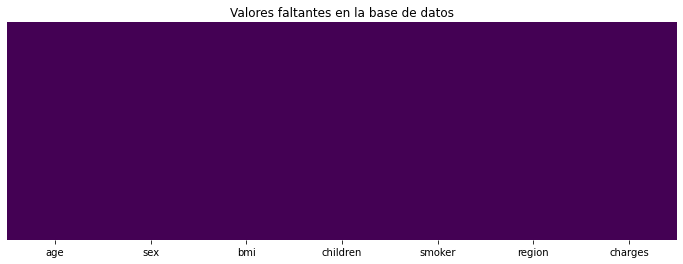

In [228]:
plt.figure(figsize = (12,4))
sns.heatmap(datos.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Valores faltantes en la base de datos')

**Transformación de variables categoricas**

Las variables sex,smoker, región son variables catecoricas que hay que transformar para poder determinar su correlación

In [229]:
#Analizando los posibles valores de las variables categoricas
fumadores = pd.unique(datos['smoker'])
fumadores

array(['yes', 'no'], dtype=object)

In [230]:
sexo = pd.unique(datos['sex'])
sexo

array(['female', 'male'], dtype=object)

In [231]:
region = pd.unique(datos['region'])
region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [232]:
#sustituimos los valores que son binarios
datos['smoker'] = datos['smoker'].replace(['yes','no'],[1,0])
datos['sex'] = datos['sex'].replace(['female','male'],[0,1])
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [233]:
#Transformando las variables de región
len(region)
region_num = np.arange(len(region))
datos['region'] = datos['region'].replace(region,region_num)

In [234]:
datos.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
95,28,0,37.620,1,0,1,3766.88380
96,54,0,30.800,3,0,0,12105.32000
97,55,1,38.280,0,0,1,10226.28420
98,56,1,19.950,0,1,3,22412.64850


**Correlación tomando en cuenta variables categoricas**

Se puede ver que la corrrelación entre las variables sex y charges es muy pequeña por lo cual podemos omitirla del modelo, al igual que la correlación entre children y charges, lo mismo sucede con region y charges

Las variables que tienen una fuerte correlación con charges son: age, bmi, smoker

In [235]:
datos.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


En el mapa de calor se puede ver que la correlación más fuerte que tiene charges es smoker

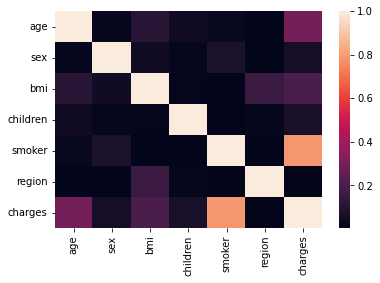

In [236]:
import seaborn as sns
sns.heatmap(datos.corr().abs())
plt.show()

**Graficas de correlación**

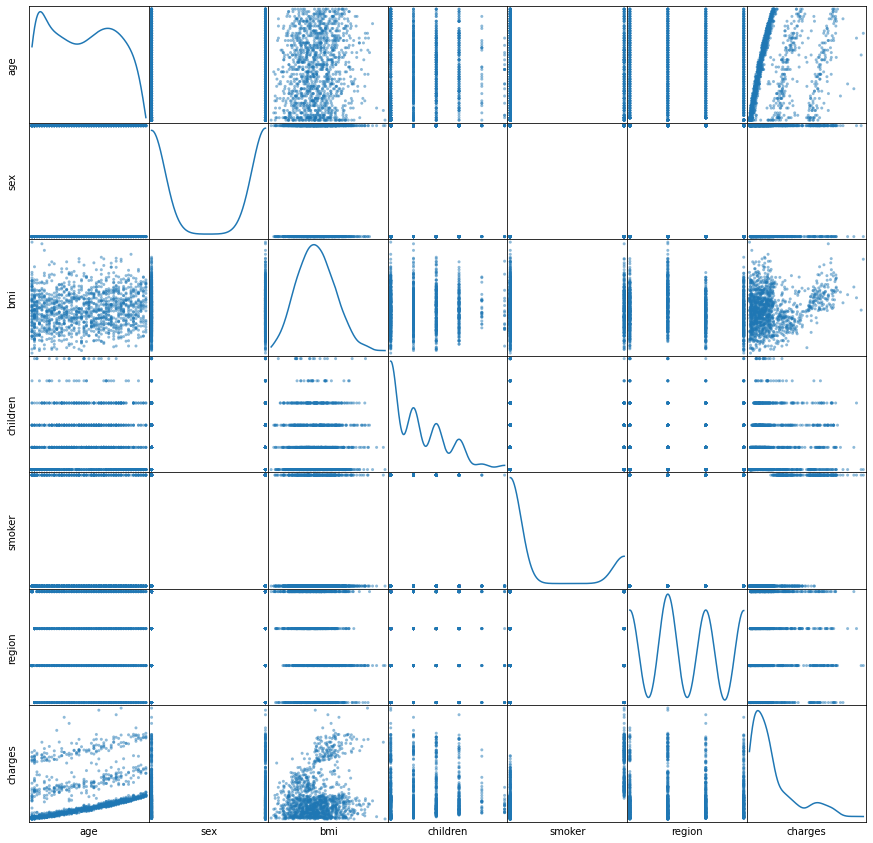

In [237]:
sm = scatter_matrix(datos, figsize=(15,15), diagonal = 'kde')
#rotación de etiquetas
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(90) for s in sm.reshape(-1)]
#etiqueta de salida
[s.get_yaxis().set_label_coords(-0.1,0.5) for s in sm.reshape(-1)]
#quitar numeros
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

**Mostrando las distribuciones, destacando la variable smoker**


<function matplotlib.pyplot.show(*args, **kw)>

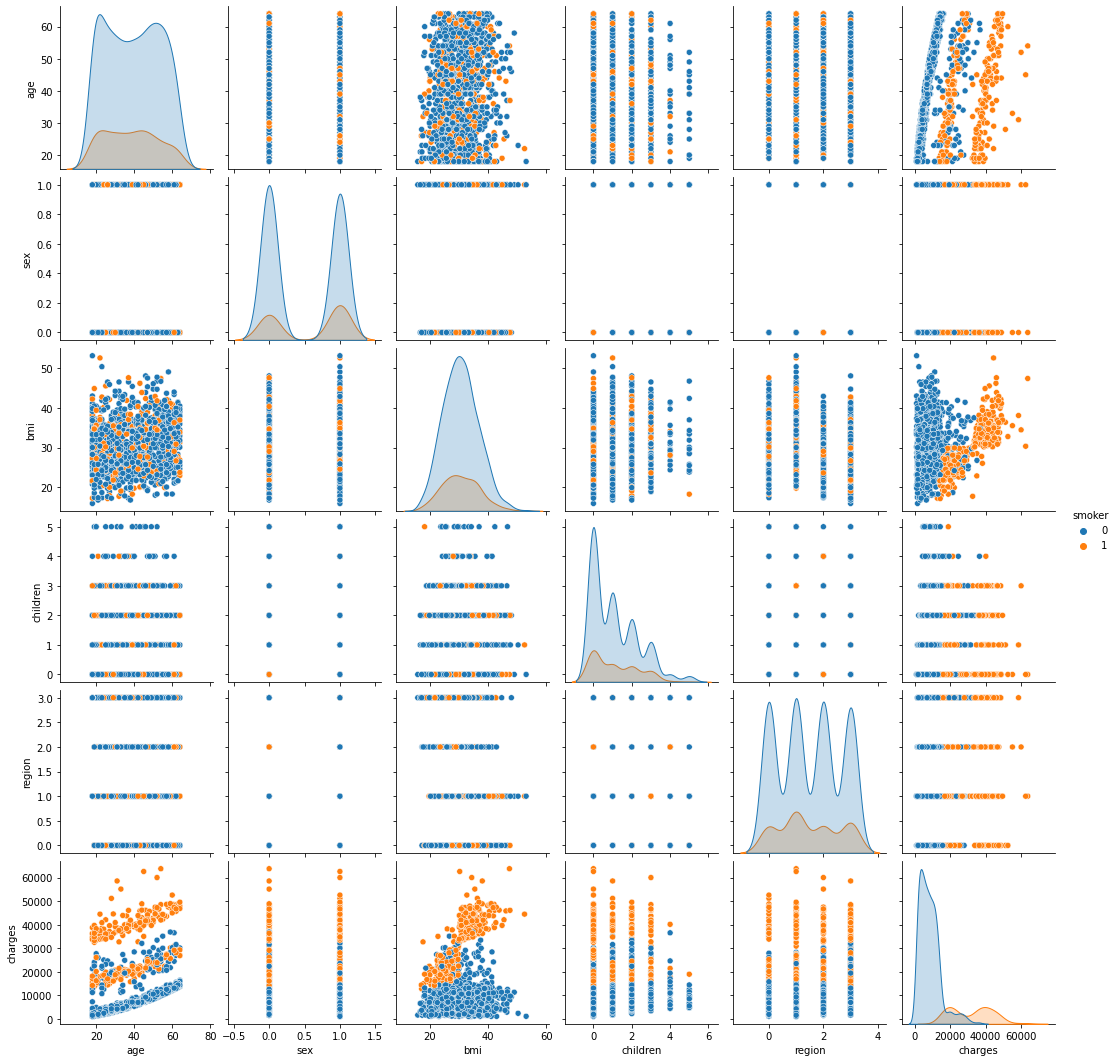

In [238]:
sns.pairplot(datos, hue = 'smoker')
plt.show


**Mostrando las distribuciones, destacando la variable age**


<function matplotlib.pyplot.show(*args, **kw)>

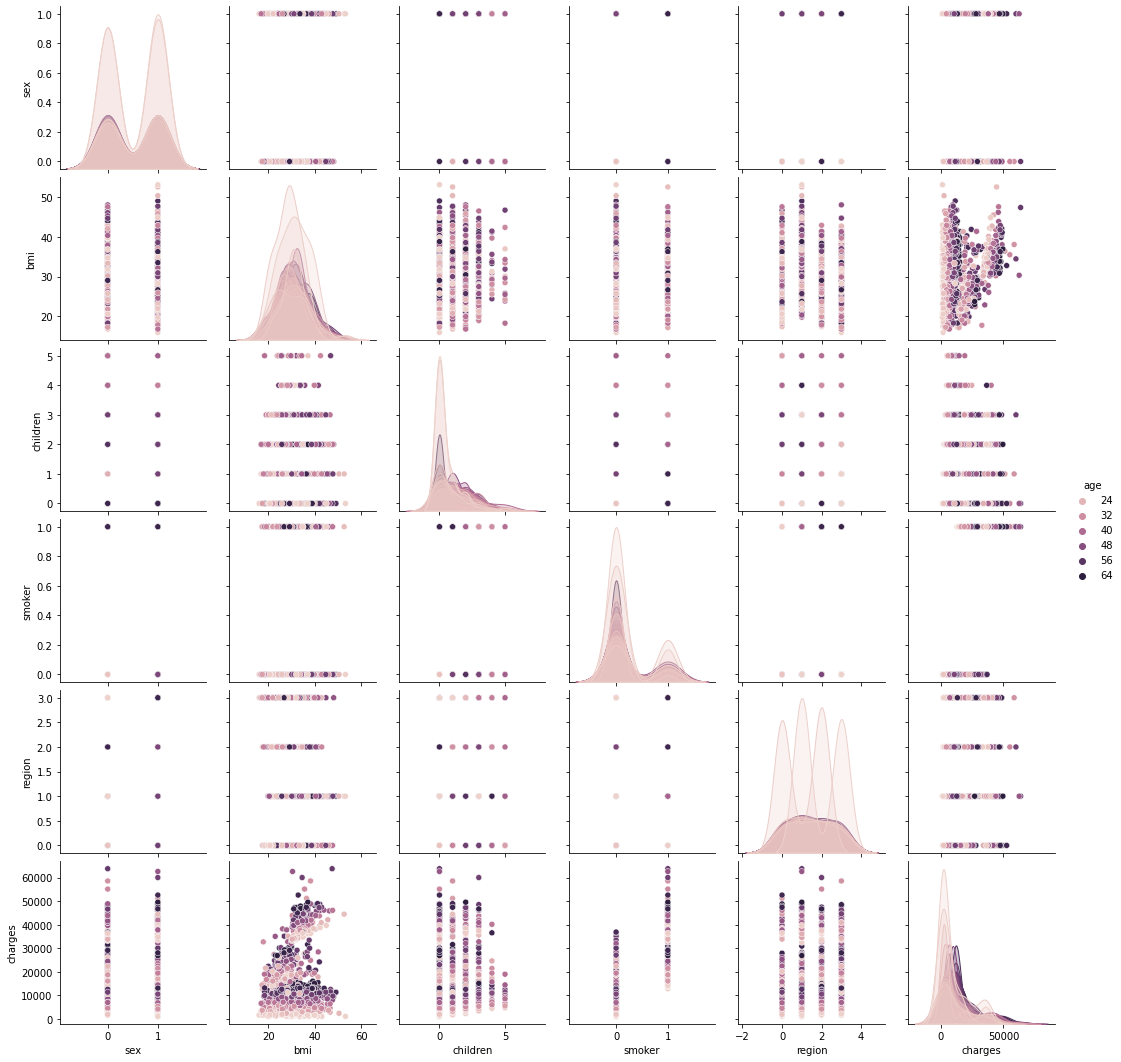

In [239]:
sns.pairplot( datos, hue = 'age' )
plt.show

**Mostrando las distribuciones, destacando la variable bmi**

<function matplotlib.pyplot.show(*args, **kw)>

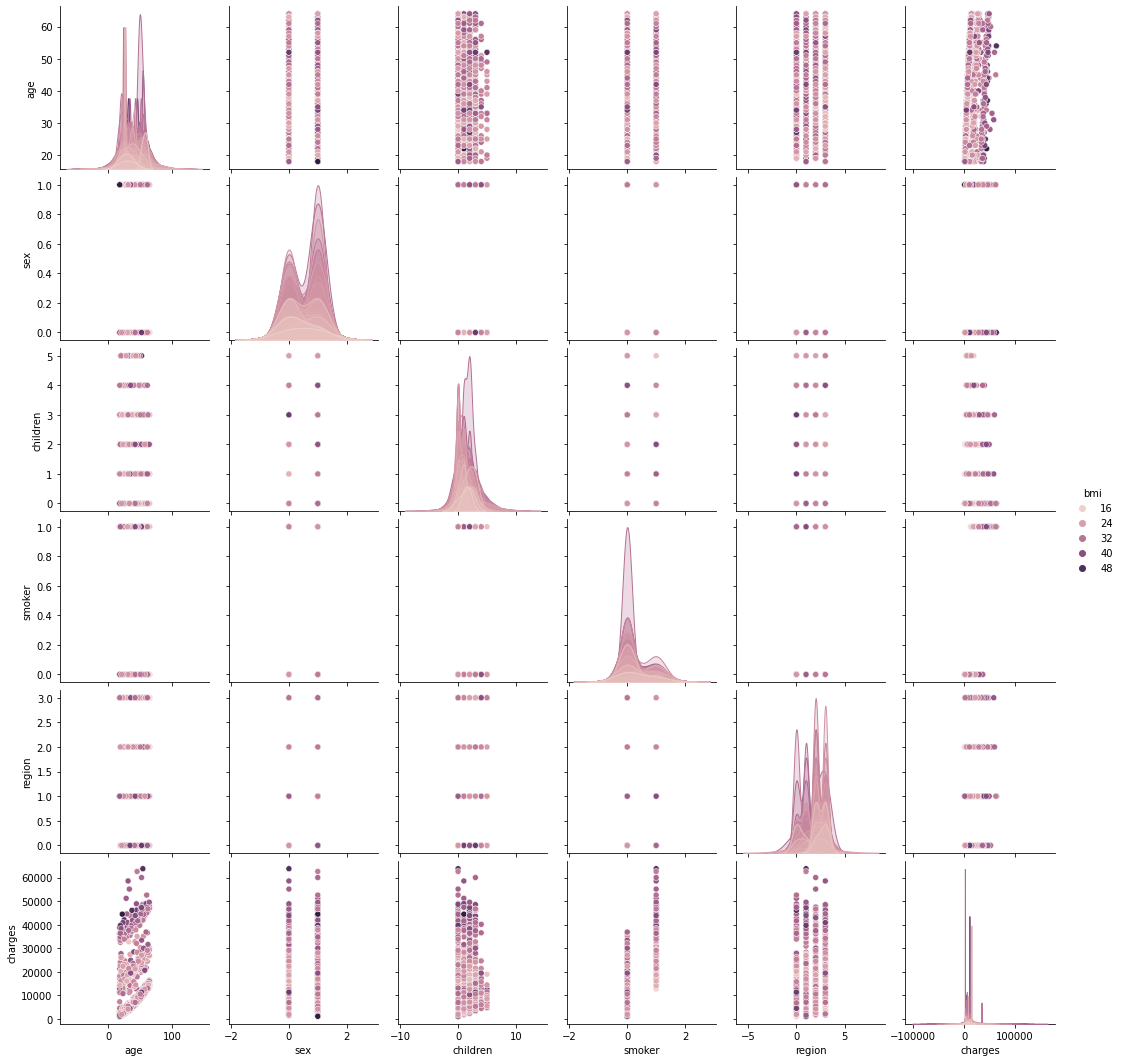

In [240]:
sns.pairplot(datos, hue = 'bmi' )
plt.show

Por la gráfica se ve que los cargos aumentan si eres fumador e incrementa la edad

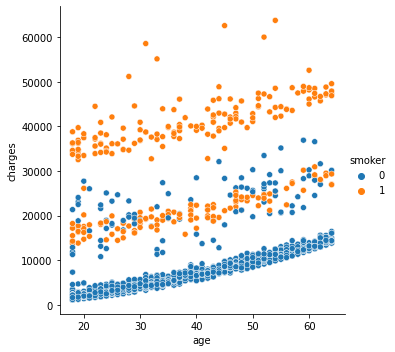

In [241]:
sns.relplot(data=datos, x= 'age', y = 'charges', hue = 'smoker')

Se puede ver que el ser fumador es un factor más determinante para aumentar los cargos que la masa muscular

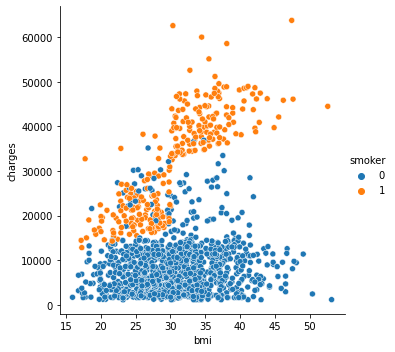

In [242]:
sns.relplot(data=datos, x= 'bmi', y = 'charges', hue = 'smoker')

**Módelo de regresión lineal para Charges**

In [243]:
def R2Ad(r2,n,k):
  Ad = 1-((1-r2)*((n-1)/(n-k-1)))
  return Ad

**Dividar bd en entrenamiento y prueba**

In [244]:
#Dividar bd en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train, test = train_test_split(datos, test_size=0.2)

In [245]:
train_x = train.loc[:, train.columns != 'charges']
test_x = test.loc[:, test.columns != 'charges']

train_y = train['charges']
test_y = test['charges']

In [246]:
train.head()

,age,sex,bmi,children,smoker,region,charges
248,19,1,20.900,1,0,0,1832.09400
393,49,1,31.350,1,0,3,9290.13950
1098,52,0,30.875,0,0,3,23045.56616
614,20,0,33.000,0,0,1,1880.07000
1109,45,1,20.350,3,0,1,8605.36150


In [247]:
train_x.head()

,age,sex,bmi,children,smoker,region
248,19,1,20.900,1,0,0
393,49,1,31.350,1,0,3
1098,52,0,30.875,0,0,3
614,20,0,33.000,0,0,1
1109,45,1,20.350,3,0,1


In [248]:
train_y.head()

248      1832.09400
393      9290.13950
1098    23045.56616
614      1880.07000
1109     8605.36150
Name: charges, dtype: float64

In [249]:
#Escalando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
x_train_scaled = pd.DataFrame(scaler.transform(train_x), columns = train_x.columns)
x_train_scaled.head()
x_test_scaled = pd.DataFrame(scaler.transform(test_x), columns = test_x.columns)

In [250]:
x_train_scaled.head()

,age,sex,bmi,children,smoker,region
0,-1.437942,0.998133,-1.614721,-0.057270,-0.505835,-1.333677
1,0.709938,0.998133,0.112322,-0.057270,-0.505835,1.372457
2,0.924726,-1.001871,0.033820,-0.908367,-0.505835,1.372457
3,-1.366346,-1.001871,0.385013,-0.908367,-0.505835,-0.431633
4,0.423554,0.998133,-1.705618,1.644923,-0.505835,-0.431633


Generando el modelo

In [251]:
model = linear_model.LinearRegression()

Se ajusta el modelo multivariable.

In [252]:
model.fit(x_train_scaled,train_y)

LinearRegression()

Recuperando coeficientes(w) de cada parámetro del modelo

In [253]:
print(model.coef_)

[3721.45190077  -29.81145986 1794.34467546  580.18433352 9609.74359819
  335.71965164]


In [254]:
#Ya que se entreno se predice con nuevos valores a que debe llegar el moedlo, y se utilizan los valores de prueba.
#test_pred es una lista de valores pronosticados en base a unos datos no utilizados previamente.

In [255]:
x_test_scaled

,age,sex,bmi,children,smoker,region
0,-0.435598,0.998133,-0.590064,-0.057270,1.976931,-1.333677
1,0.208766,0.998133,1.075831,0.793827,-0.505835,-0.431633
2,-1.079962,0.998133,0.065221,-0.908367,1.976931,1.372457
3,0.709938,-1.001871,-0.123184,-0.908367,-0.505835,0.470412
4,0.924726,0.998133,1.007245,0.793827,-0.505835,0.470412
...,...,...,...,...,...,...
263,-1.509538,-1.001871,-0.091783,-0.908367,-0.505835,1.372457
264,-0.721982,-1.001871,0.803140,-0.908367,-0.505835,-0.431633
265,-0.220810,0.998133,0.137112,-0.908367,-0.505835,-1.333677
266,-0.650386,0.998133,-0.861102,-0.908367,-0.505835,1.372457


In [256]:
test_pred = model.predict(x_test_scaled)


In [257]:
test_pred

array([28928.2444028 , 11253.28753892, 28120.7921626 , 10341.80073869,
       14097.4646217 ,  2936.74644178, 14618.26638994,  5053.33935777,
       16192.27366563,  6352.18349442,  5813.88819435, 28232.4121545 ,
       38975.72749233, 28005.24024691,  8187.71582776,  4695.54402741,
        5918.77939568,  5225.24339847, 12370.35197199,  7342.88853483,
        9422.66147681, 10380.07386682,  4052.92449994, 36949.64086665,
        4256.94258818, 11739.37347586,  6818.53920245, 11267.74159144,
       11550.88517274, 11251.12966883,  9177.41182673,  9956.11603022,
       30279.70918674, 12790.77626028, 34140.10339033, 13564.61611148,
       31617.38334292,  6442.14941132,  8890.89361007, 14962.433331  ,
       12419.13427397, 11050.63283564,  5480.72430272, 26079.59898728,
        7362.49589819, 10184.04893609, 10497.12262767, 31595.73404253,
       10557.34085386, 11146.84325631,  6100.53404685, 13862.47475224,
       34917.99758664, 17430.26953254,  3736.22557259, 31349.43834396,
      

In [258]:
#Diferencia cuadratica media entre el valor calculado y el valor real, entre más cerca a cero es más efectivo el modelo

In [259]:
mean_squared_error(test_y, test_pred)

36981810.83005752

In [260]:
#Se calcula la r cuadrada, mientras más se acerque a uno mejor.

In [261]:
r2 = r2_score(test_y, test_pred)
print (r2)

0.7450599656763854


In [262]:
n, k = np.shape(x_test_scaled)
#n, son las filas observadas
#k las variables predictoraas o numero de columnas para determinar Charge, es decir la longitud de número de variables

In [263]:
 #R ajustada
 R2Ad(r2,n,k)

0.7391992752321644

**Regresión Ridge**

In [264]:
from sklearn.linear_model import  Ridge, Lasso

In [274]:
x_train_scaled

,age,sex,bmi,children,smoker,region
0,-1.437942,0.998133,-1.614721,-0.057270,-0.505835,-1.333677
1,0.709938,0.998133,0.112322,-0.057270,-0.505835,1.372457
2,0.924726,-1.001871,0.033820,-0.908367,-0.505835,1.372457
3,-1.366346,-1.001871,0.385013,-0.908367,-0.505835,-0.431633
4,0.423554,0.998133,-1.705618,1.644923,-0.505835,-0.431633
...,...,...,...,...,...,...
1065,-1.437942,0.998133,-0.264487,-0.908367,1.976931,0.470412
1066,-0.364002,-1.001871,-0.076082,-0.057270,1.976931,0.470412
1067,1.354301,-1.001871,-0.904072,-0.908367,-0.505835,-1.333677
1068,-0.507194,0.998133,-0.421491,2.496020,1.976931,0.470412


In [276]:
Rd = Ridge()
model = Rd.fit(x_train_scaled, train_y)
y_predict = model.predict(x_test_scaled)
print('r2:', r2_score(test_y, y_predict))
r2 = r2_score(test_y, y_predict)
n, k = np.shape(x_test_scaled)
print('r2_ad:', R2Ad(r2,n,k) )


r2: 0.7450708962537239
r2_ad: 0.7392104570871428


**Regresión Lasso**

In [266]:
Ls = Lasso()
model = Ls.fit(x_train_scaled, train_y)
y_predict = model.predict(x_test_scaled)
print(r2_score(test_y, y_predict))
r2 = r2_score(test_y, y_predict)
n, k = np.shape(x_test_scaled)
print('r2_ad', R2Ad(r2,n,k) )

0.7450492386062908
r2_ad 0.7391883015627573


**KNN**

In [267]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score

In [268]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    model = knn.fit(x_train_scaled, train_y)
    y_predict = model.predict(x_test_scaled)
    print('n_neighbors', n_neighbors)
    print('weights',weights)
    print(r2_score(test_y, y_predict))

n_neighbors 5
weights uniform
0.8116905811477235
n_neighbors 5
weights distance
0.7955777625120323


In [269]:
n_neighbors = 5
for k in np.arange(1,7):
    knn = KNeighborsRegressor(n_neighbors = k, weights="uniform")
    y_predict = knn.fit(x_train_scaled, train_y).predict(x_test_scaled)
    n, ki = np.shape(x_test_scaled)    
    print('n_neighbors', k)
    r2 = r2_score(test_y, y_predict)
    print('r2', r2)
    print('r2_ad', R2Ad(r2,n,ki) )    

n_neighbors 1
r2 0.6413912751662801
r2_ad 0.6331473964344705
n_neighbors 2
r2 0.761054322535594
r2_ad 0.7555613184559525
n_neighbors 3
r2 0.7831601986822374
r2_ad 0.7781753756634383
n_neighbors 4
r2 0.8045380087933667
r2_ad 0.8000446296851682
n_neighbors 5
r2 0.8116905811477235
r2_ad 0.8073616289901999
n_neighbors 6
r2 0.8060966573044465
r2_ad 0.8016391091965027


In [270]:
Model = []
RMSE = []
R_sq = []
cv = KFold(5)
MAPE = []

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [271]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train_scaled, train_y)

In [272]:
R_sq_ad = []
for Rs in R_sq:
  R_sq_ad.append(R2Ad(Rs,n,k))

In [273]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq,
                           'R2_ad':R_sq_ad})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared,R2_ad
0,Linear Regression,6085.453909,0.744924,0.739060
1,Ridge Regression,6085.395481,0.744940,0.739077
2,Lasso Regression,6085.406820,0.744929,0.739066
3,K Neighbors Regressor,5440.429875,0.794486,0.789761
4,Decision Tree Regressor,6249.281951,0.728482,0.722240
5,Random Forest Regressor,4828.311726,0.839689,0.836004
6,Gradient Boosting Regressor,4549.374437,0.857309,0.854029
7,Adaboost Regressor,5299.393810,0.813219,0.808925
